In [1]:
import os
import numpy as np
import pandas as pd
from scipy import stats
from datetime import date, datetime, timedelta
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
directory = os.path.abspath("").split("\\")[:-1]
csv_path = "/".join(directory + ["03_Process", "Clean_Cyclistic_Data.csv"])

df = pd.read_csv(csv_path, index_col=0)

In [3]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,start_hour,season,month
0,C809ED75D6160B2A,electric_bike,2021-05-30 11:58:15,2021-05-30 12:10:39,N Clark St & W Elm St,Streeter Dr & Grand Ave,41.900000,-87.630000,41.892278,-87.612043,casual,12.400000,6,11:00,spring,5
1,DD59FDCE0ACACAF3,electric_bike,2021-05-30 11:29:14,2021-05-30 12:14:09,DIVVY CASSETTE REPAIR MOBILE STATION,Museum of Science and Industry,41.880958,-87.616743,41.791728,-87.583945,casual,44.916667,6,11:00,spring,5
2,0AB83CB88C43EFC2,electric_bike,2021-05-30 14:24:01,2021-05-30 14:25:13,Milwaukee Ave & Fullerton Ave,Milwaukee Ave & Fullerton Ave,41.920000,-87.700000,41.920000,-87.700000,casual,1.200000,6,14:00,spring,5
3,7881AC6D39110C60,electric_bike,2021-05-30 14:25:51,2021-05-30 14:41:04,Milwaukee Ave & Fullerton Ave,Rockwell St & Fletcher St,41.920000,-87.700000,41.940000,-87.690000,casual,15.216667,6,14:00,spring,5
4,853FA701B4582BAF,electric_bike,2021-05-30 18:15:39,2021-05-30 18:22:32,Rockwell St & Fletcher St,Elston Ave & Henderson St,41.940000,-87.690000,41.940000,-87.700000,casual,6.883333,6,18:00,spring,5


In [4]:
# number of members vs number of riders

df["member_casual"].value_counts()

member    3220186
casual    2532599
Name: member_casual, dtype: int64

## Ride Length (time)

In [5]:
# average ride_length of members vs casuals

df.groupby("member_casual")["ride_length"].mean()

member_casual
casual    29.041099
member    12.899898
Name: ride_length, dtype: float64

In [6]:
# distribution of ride_length, member vs casual

df.groupby("member_casual").ride_length.describe()

,count,mean,std,min,25%,50%,75%,max
member_casual,,,,,,,,
casual,2532599.0,29.041099,233.284842,0.0,8.816667,15.550000,28.400000,55944.150000
member,3220186.0,12.899898,20.117306,0.0,5.333333,9.183333,15.916667,1499.933333


In [7]:
# 1% trimmmed average ride_length for members and casuals

avg_trimmed_members = stats.trim_mean(df[df["member_casual"] == "member"].ride_length, 0.01)
avg_trimmed_casuals = stats.trim_mean(df[df["member_casual"] == "casual"].ride_length, 0.01)

print(f"members: {avg_trimmed_members}\ncasuals: {avg_trimmed_casuals}")

members: 11.994285038731002
casuals: 23.313622640916478


In [8]:
# ride length by season

avg_trimmed_winter = stats.trim_mean(df[df["season"] == "winter"].ride_length, 0.01)
avg_trimmed_spring = stats.trim_mean(df[df["season"] == "spring"].ride_length, 0.01)
avg_trimmed_summer = stats.trim_mean(df[df["season"] == "summer"].ride_length, 0.01)
avg_trimmed_autumn = stats.trim_mean(df[df["season"] == "autumn"].ride_length, 0.01)

print(f"winter: {avg_trimmed_winter}\nspring: {avg_trimmed_spring}\nsummer: {avg_trimmed_summer}\nautumn: {avg_trimmed_autumn}")

winter: 12.562520737823027
spring: 18.203198484203757
summer: 18.30887208849457
autumn: 13.600595573740813


In [9]:
# average ride length (time) by season by membership status

for status in ["casual", "member"]:
    avg_trimmed_winter = stats.trim_mean(df[(df["season"] == "winter") & (df["member_casual"] == status)].ride_length, 0.01)
    avg_trimmed_spring = stats.trim_mean(df[(df["season"] == "spring") & (df["member_casual"] == status)].ride_length, 0.01)
    avg_trimmed_summer = stats.trim_mean(df[(df["season"] == "summer") & (df["member_casual"] == status)].ride_length, 0.01)
    avg_trimmed_autumn = stats.trim_mean(df[(df["season"] == "autumn") & (df["member_casual"] == status)].ride_length, 0.01)

    print(f"""{status}: 
        winter: {avg_trimmed_winter}
        spring: {avg_trimmed_spring}
        summer: {avg_trimmed_summer}
        autumn: {avg_trimmed_autumn}\n""")

casual: 
        winter: 19.69543090430399
        spring: 26.029165186007905
        summer: 23.96237471890435
        autumn: 18.966652960943758

member: 
        winter: 10.434350367627582
        spring: 12.44557051177263
        summer: 12.961584617959424
        autumn: 10.905228603364469



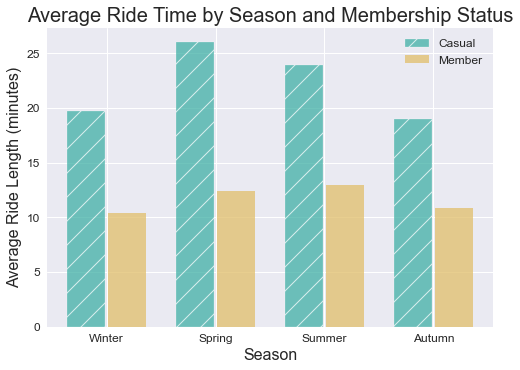

In [37]:
szn_avg_cas = [19.69543090430399, 26.029165186007905, 23.96237471890435, 18.966652960943758]
szn_avg_mem = [10.434350367627582, 12.44557051177263, 12.961584617959424, 10.905228603364469]
width = 0.35
x = np.arange(len(szn_avg_cas))


plt.style.use("seaborn")
fig, ax = plt.subplots()
_ = ax.bar(
    x - (width/2 + 0.0125), szn_avg_cas, 
    color="#40B0A6", alpha=0.75, edgecolor="white", hatch="/", width=width,
    label="Casual")

_ = ax.bar(
    x + (width/2 + 0.0125), szn_avg_mem,
    color="#E1BE6A", alpha=0.75, width=width,
    label="Member")

_ = ax.set(
    xticks=x,
    xticklabels=["Winter", "Spring", "Summer", "Autumn"],
)
_ = ax.tick_params(axis="both", which="major", labelsize=12)
_ = ax.set_title("Average Ride Time by Season and Membership Status", fontsize=20)
_ = ax.set_ylabel("Average Ride Length (minutes)", fontsize=16)
_ = ax.set_xlabel("Season", fontsize=16)
_ = ax.legend(prop={"size": 12})

plt.savefig("avg_ridelength_by_season_membership.png", dpi=600, format="png")

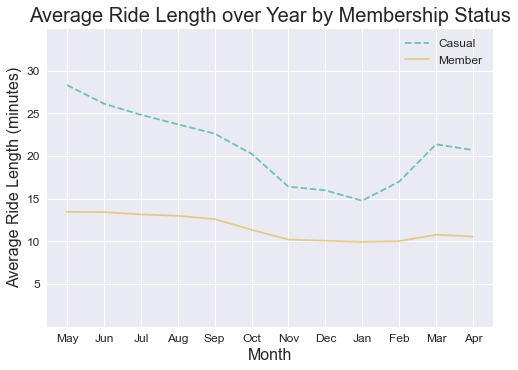

In [65]:
monthly_avg_cas = []
monthly_avg_mem = []
months = [5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4]   # data is from may 2021-april 2022

for month in months:
    monthly_avg_cas.append(stats.trim_mean(df[(df["month"] == month) & (df["member_casual"] == "casual")].ride_length, 0.01))
    monthly_avg_mem.append(stats.trim_mean(df[(df["month"] == month) & (df["member_casual"] == "member")].ride_length, 0.01))

x = np.arange(len(monthly_avg_mem))

fig, ax = plt.subplots()
_ = ax.plot(x, monthly_avg_cas, color="#40B0A6", linestyle="--", alpha=0.75, label="Casual")
_ = ax.plot(x, monthly_avg_mem, color="#E1BE6A", alpha=0.75, label="Member")

_ = ax.set(
    xticks=x,
    xticklabels=["May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec", "Jan", "Feb", "Mar", "Apr"],
    yticks=[0, 5, 10, 15, 20, 25, 30, 35],
    yticklabels=["", "5", "10", "15", "20", "25", "30", ""]
)
_ = ax.tick_params(axis="both", which="major", labelsize=12)
_ = ax.set_xlabel("Month", fontsize=16)
_ = ax.set_ylabel("Average Ride Length (minutes)", fontsize=16)
_ = ax.set_title("Average Ride Length over Year by Membership Status", fontsize=20)
_ = ax.set_ylim(0)

_ = ax.legend(prop={"size": 12})

plt.savefig("avg_ridelength_overyear_by_membership.png", dpi=600, format="png")